### Coursera Capstone Project Report

# Analysis of Toronto Neighborhood Venue and House Listing Price Data

### Wenqing Zhou, Ph.D.

## 1. Introduction
### 1.1 Background and Problem Description

Toronto is the capital city of Ontario, Canada. It is the most populous city in Canada with a population of 2.73 million in 2016. As an important destination for immigrants to Canada, Toronto enjoys a diverse population with more than 50% of its residents belong to minority population group [1]. They make Toronto one of the most multicultural and multiracial cities in the world, shaping its complex structure and creating a unique business environment. To narrow down the scope of the problem, we will focus on the 140 neighborhoods of the City of Toronto.

This project would provide useful information to the following people:
* For **business starters** who are looking for locations to start their business in Toronto, they would prefer neighborhoods with lower real estate cost and less competitors from the type of their business. 
* For **people looking for new homes in Toronto**, they would also want to narrow their search to a neighborhood that has affordable house price and the type of venues they prefer. 
* For **real estate agencies**, the relationship between house prices and the venue environment could also help them make better recommendations to their customers.

In this project, we will discover the relationship between the house listing price and the venue environment of the neighborhoods of Toronto, and the goal is to create a map visualize such relationship.

### 1.2 Data Description

In this project, the following data will be used to achieve the aformentioned goal:

* **Toronto neighborhood data**: The official neighborhood data of the City of Toronto can be obtained from the *City of Toronto's Open Data Portal* [2]. Data include the name of each neighborhood and their geometry boundary and are available via **CKAN API**. They will be used to determine the center of each neighborhood (using **shapely** and **geopandas**). The data is also downloadable in .geojson format and will be used to create choropleth map for house price.

* **Foursquares API**: the Foursquares API [3] will be used to obtain the most common venues for each neighborhood.

* **Toronto House Listing Price**: There are limited data revealing the house price of Toronto by neighborhood. Fortunately, *listing.ca* [4] provides average Toronto house listing price by neighborhood. The listing price can be viewed as an approximation of the house price. The commercial software *Octoparse 8* with free plan is used to scrape house price data from the website.


## 2. Methodology

### 2.1 Toronto Neighborhoods

Following instructions on https://open.toronto.ca/dataset/neighbourhoods/ [2], we can obtain Toronto neighborhoods data as follows.

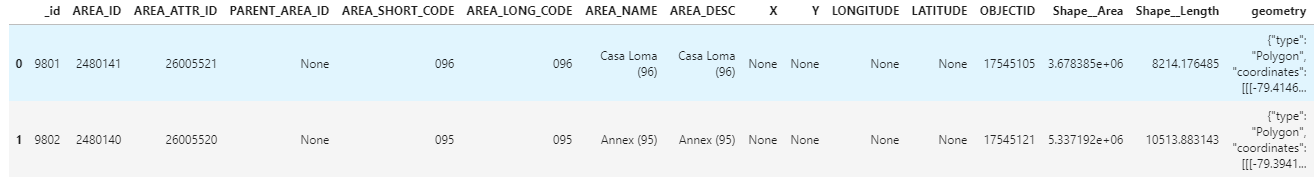

Based on our need, we only need **AREA_NAME**, **geometry**. Using **shapely** and **geopandas**, we can find centroids for the polygon representing each neighborhood, given as:

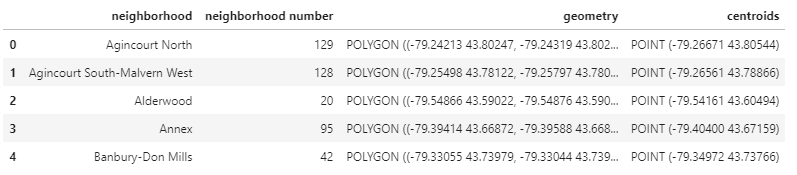

With the above dataframe and the geojson file downloaded from https://open.toronto.ca/dataset/neighbourhoods/ [2], we can visualize the neighborhood center and their boundaries using **folium** library as follows. The longitude and latitude of the center of each neighborhood is the x coordinate and y coordinate of its corresponding centroid.

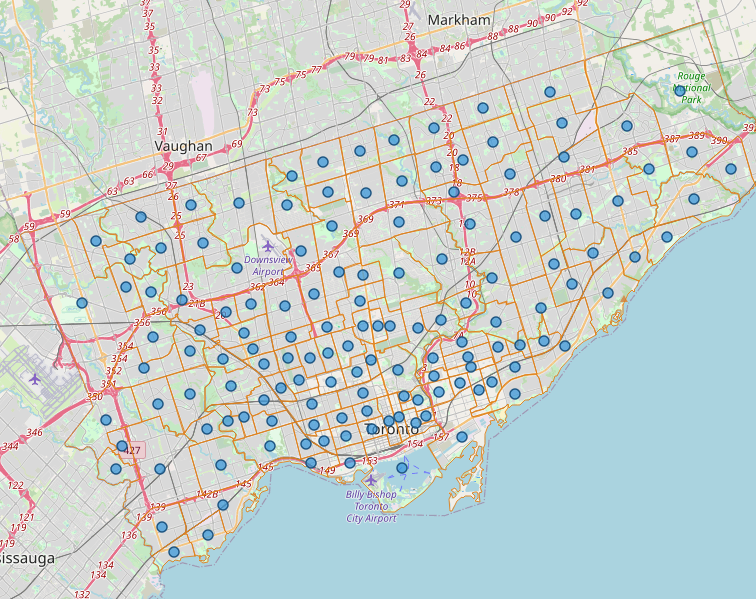

### 2.2 Toronto Neighborhood Venues

**Foursquares API** is used to explore the neighborhoods' venues. Since the house price data is of Year 2020, the **VERSION** used for Foursquares API is set to **20201201** to ensure timeliness. For each neighborhood, we would retrieve up to **100** nearby venues within the radius of **1000 m** from its centeriod position determined earlier. The head of the resulting dataframe is given as follows:

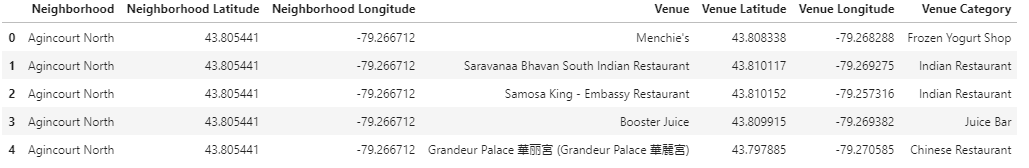

We can then check the number of venues returned to ensure the Foursquares API returned reliable results. There are **14** neighborhoods that Foursquares API returned maximum number of venues (**100**):

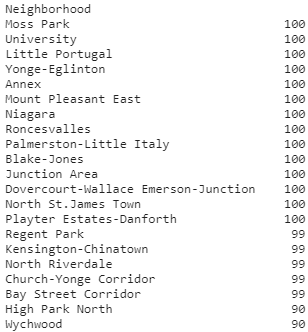

There are **12** neighborhoods that Foursquares API returned less than **10** venues.

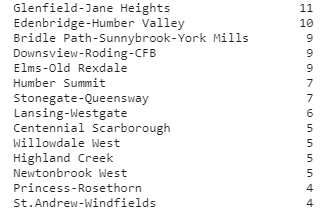

By checking these neighborhoods in **Google Maps**, we can see that the neighborhoods with maximum number of venues (**100**) returned are located in downtown area of Toronto. For example, neighborhoods *Moss Park* and *Niagara* are all in the downtown Toronto area where a large number of businesses locate, see below:

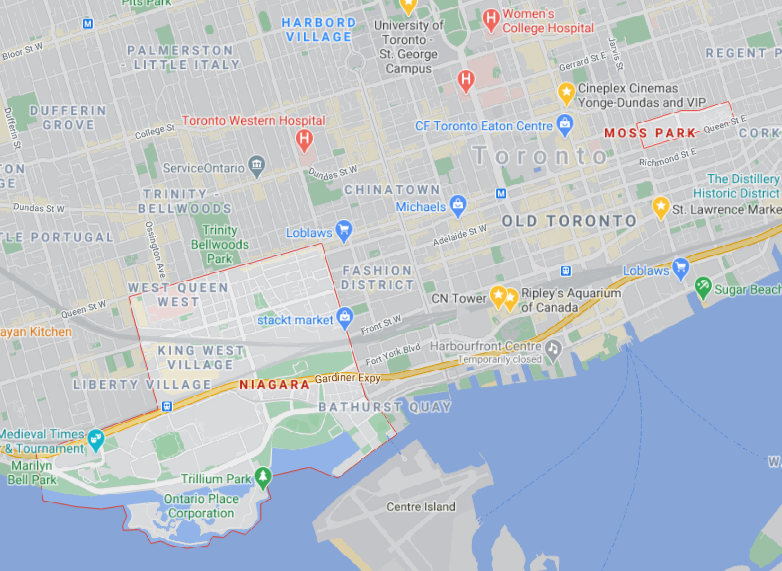

And those neighborhoods with less than 10 venues returned by Foursquares API locate in suburban area of the City of Toronto, and the neighborhood is mostly residential area. For example, neighborhood *St.Andrew-Windfields*, see below (highlighted neighborhood):

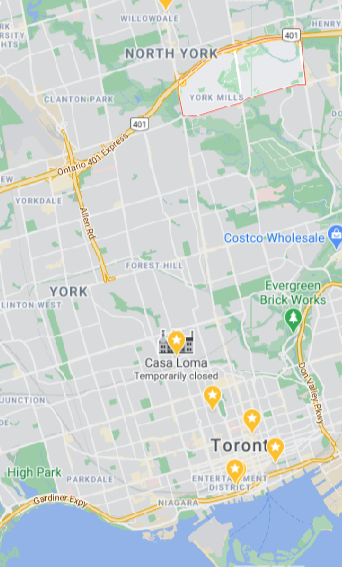

As such, the venues returned by Foursquares API is reliable.

There are a total of **348** unique categories returned by Fouqsquares, and the top 10 most common venues for each neighborhood are summarized in the following dataframe:

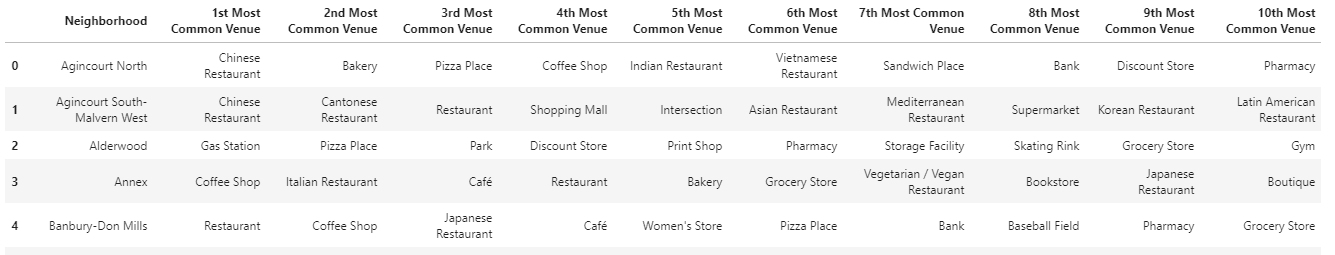

### 2.3 Clustering Neighborhoods

To categorize neighborhoods based on their common venues, **K-means clustering** algorithm is used to cluster neighborhoods. It is one of the most popular unsupervised learning algorithm for clustering. In this project, the top 10 most common venues for each neighborhood will be used for clustering.

To determine the best k value to use in the K-means, we can use the elbow method based on the distortion. The follow chart suggests that **k=3** would be the optimal value to use our case.

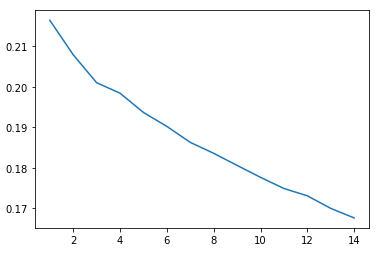

The head of the resulting dataframe with cluster labels are given as follows:

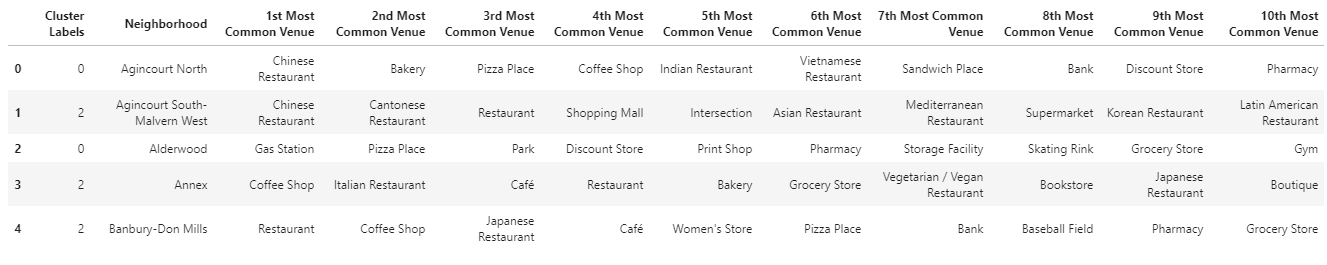

The cluster result can be visualized on the map as follows, where:

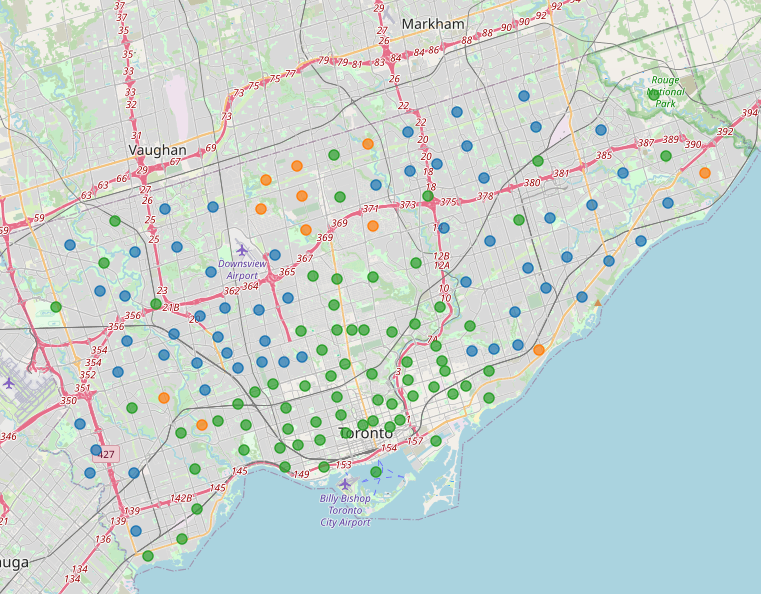

To describe each cluster, we can check the top **3** most common venues of each neighborhood in a given cluster.

The following table shows the most common venues of the first cluster (cluster 0, blue circles):

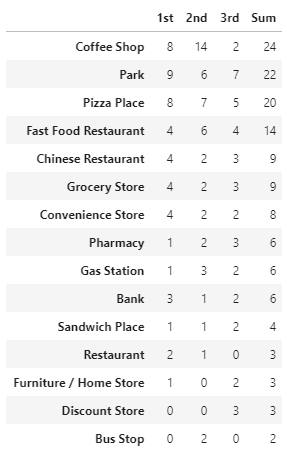

The following table shows the most common venues of the second cluster (cluster 1, orange circles):

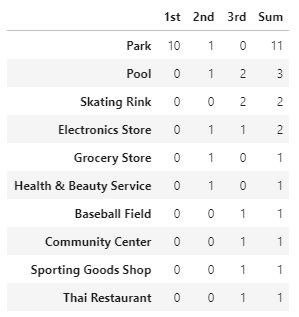

The following table shows the most common venues of the third cluster (cluster 2, green circles):

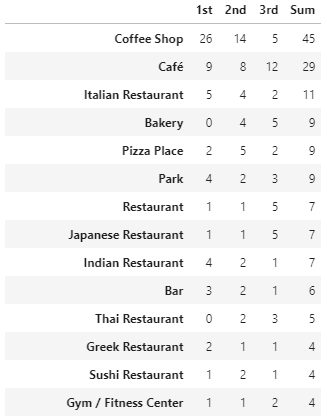

Based on the above three tables, we can provide a descriptive label for each cluster as follows:
* **Cluster 0**: Public amenities-dominant neighborhoods
* **Cluster 1**: Outdoor amenities-dominant neighborhoods
* **Cluster 2**: Food service-heavy neighborhoods

### 2.4 Toronto House Listing Price

The average house listing price for each neighborhood in Toronto is scraped from *listing.ca* [4] The result is presented in a simple dataframe containing neiborhood names and average house listing price as follows:

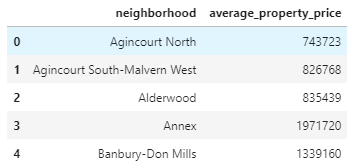

After correcting a few neighborhood names, we can plot a choropleth map showing the average house listing price in each neighborhood:

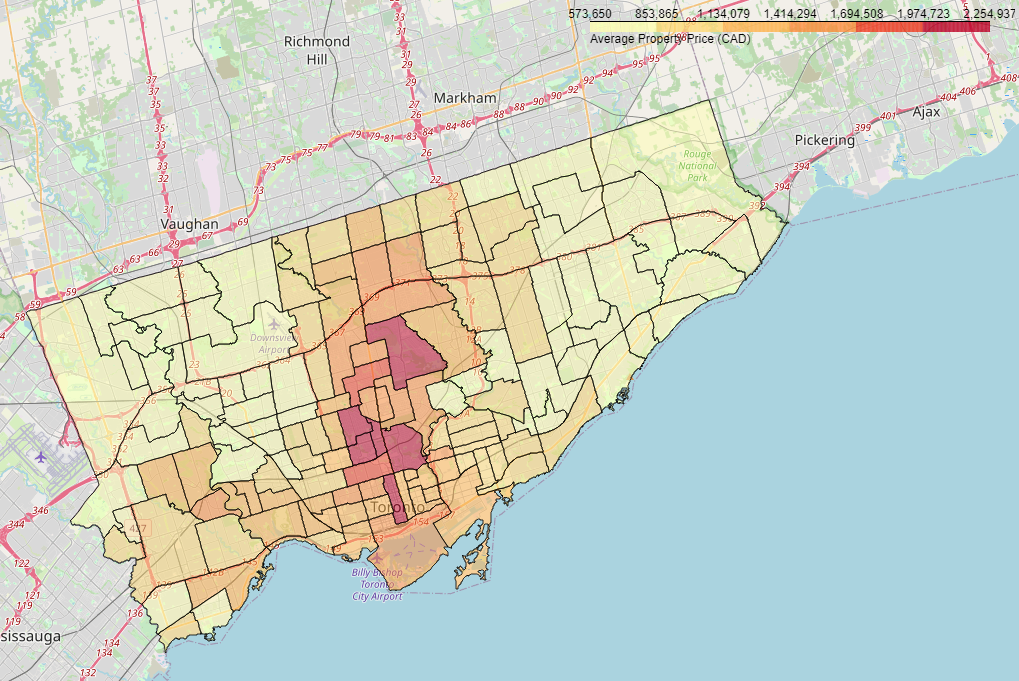

## 3. Results

The venue data, clustering result, and the average house listing price can be summarized in the following dataframe:

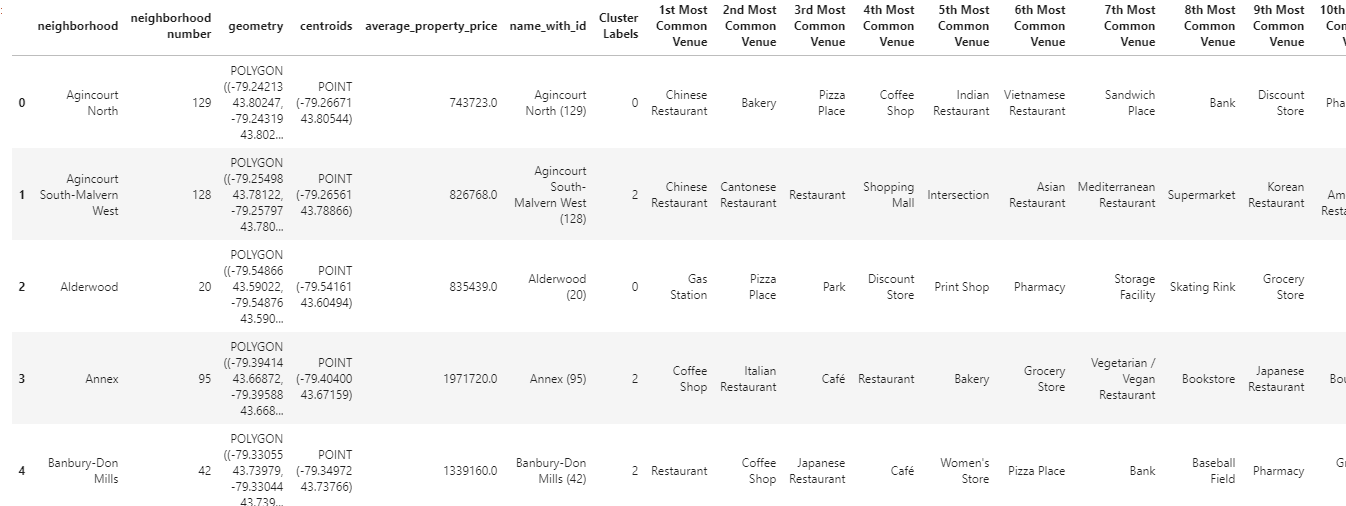

We can also overlay the cluster result onto the house price choropleth map:

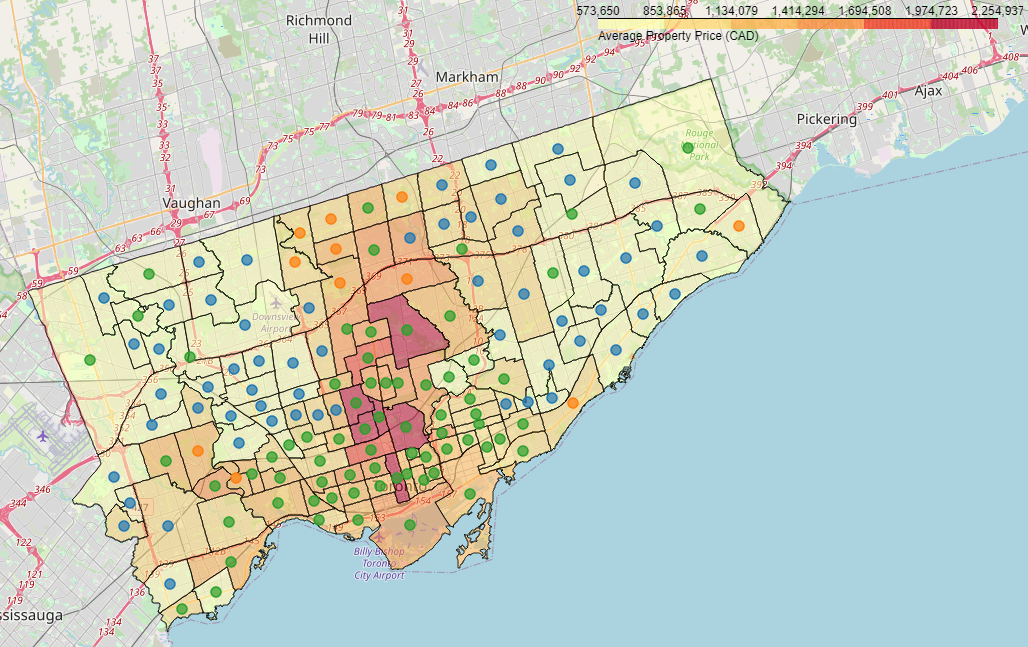

Descriptive cluster labels are also summarized as follows:
* **Cluster 0 (Blue)**: Public amenities-dominant neighborhoods
* **Cluster 1 (Orange)**: Outdoor amenities-dominant neighborhoods
* **Cluster 2 (Green)**: Food service-heavy neighborhoods

We can observe that the average house price is higher in neighborhoods of Cluster 1 and Cluster 2, where neighborhoods of Cluster 0 has lower house price.

## 4. Discussions

It can be seen that the average house prices in neighborhoods of Cluster 1 and Cluster 2 is higher than those in neighborhoods of Cluster 0. 

By looking at the geological locations of Cluster 0 neighborhoods, we found that they are mostly in suburban areas of Toronto and are residential area-heavy. They have less commercial zones, thus the venues in these neighborhoods are mostly basic public amenities such as coffee shops, grocery/convenience stores, bank, gas station, etc. 

The most common venues of Cluster 1 neighborhoods include parks, pools, and skating sinks. These amenities are mostly related outdoor/sport activities. These neighborhoods are also in suburban areas having better environment because of those parks, which is probably the reason that they have higher house prices. 

As for Cluster 2 neighborhoods, they cover the highest house prices of Toronto. They are mostly located in downtown area of Toronto. The fact that their most common venues contains a variety of restaurants indicates they include high-density commercial areas. 

For **business starters**:
* Cluster 0 neighborhoods have lower house prices, and less competitive businesses environment for certian type of business, such as Japanese restaurants. They could become potential choice of locations for business starters with tight budgets.
* The business density is low in Cluster 1 neighborhoods. Considering the venues in this cluster, businesses like outdoor actvity gear stores could be more popular in these neighborhoods.
* The business density is high, and the real estate price is also high in Cluster 2 neighborhoods. They offer more competitive and high risk high return business environment.

For **people looking for new homes in Toronto**:
* Cluster 0 neighborhoods have lower house price and basic amenities, but they offer fewer restaurant/entertainment choices.
* Cluster 1 neighborhoods have higher house price and have more parks and outdoor activity amenities.
* Cluster 2 neighborhoods have the highest house price, but they have highly commercialized areas and the most diverse restaurant/shopping/entertainment choices.

These guidance can also be used by real estate agents for recommending better choices to their customers. For more detailed or personalized guidance, we can expand the data set to include more details of the neighborhoods, e.g., demographic data.

In this project, the venues for a given neighborhood is obtained based on a single coordinate. For some neighborhoods with large area, they cannot well represent the venues in those neighborhoods. For these neighborhoods, the venues could be obtained based on multiple points in the neighborhood to get better coverage. Also, for more accurate house price data, we could use some commercial real estate database.

## 5. Conclusions

In this project, we analyzed Toronto neighborhood based on their venues data and house listing price data. By using the K-Means algorithm, we categorized Toronto neighborhoods into three clusters based on the top 10 most common venue of each neighborhood. By referring to the most common venues of each cluster, descriptive cluster labels are created for each cluster. Based on the venues and geographic location, some guidance and suggestions for business starters and people looking for new homes in Toronto are provided. More in-depth analysis of Toronto neighborhoods can be performed based on this framework.

The analysis in this project not only revealed some insights on the relationship between the neighborhoods' venues and its house price, but also provides information about the amenities and business environment in each neighborhoods. These data can not only benefit people who are looking for opportunities in Toronto, but also make each Toronto neighborhood a better place to live.

### References

[1] https://en.wikipedia.org/wiki/Toronto \
[2] https://open.toronto.ca/dataset/neighbourhoods/ \
[3] https://developer.foursquare.com/developer/ \
[4] https://toronto.listing.ca/real-estate-prices-by-community.htm